## Experiment 6
##### Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

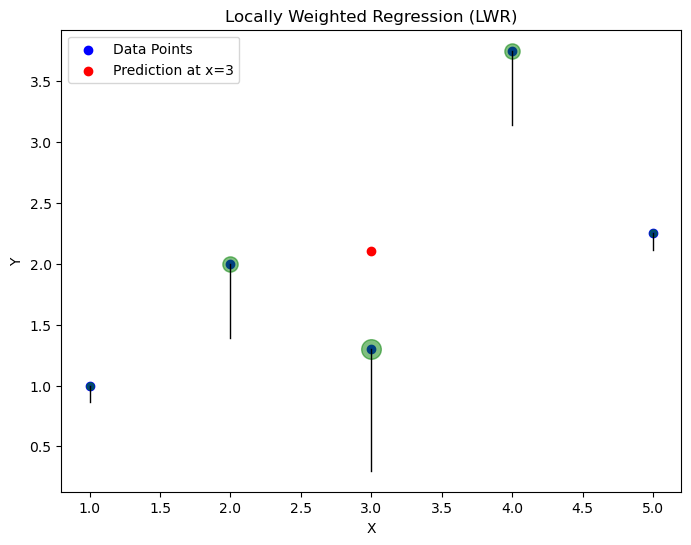

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate weights using a Gaussian kernel
def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

# Function to perform Locally Weighted Regression
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add a column of ones for the intercept
    x_query_b = np.array([1, x_query])  # Prepare the query point with intercept
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Create a diagonal weight matrix
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y  # Calculate regression coefficients
    return x_query_b @ theta  # Return the predicted value

# Define the dataset
X = np.array([1, 2, 3, 4, 5])  # Input values
y = np.array([1, 2, 1.3, 3.75, 2.25])  # Output values

# Set the query point and bandwidth
x_query = 3  # Point to predict
tau = 1.0  # Bandwidth parameter

# Get the prediction for the query point
y_pred = locally_weighted_regression(X, y, x_query, tau)

# Create a plot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Plot the original data points
plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x={x_query}')  # Plot the prediction

# Show the effect of weights on the prediction
weights = gaussian_kernel(X, x_query, tau)  # Calculate weights for visualization
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y[i] - weights[i]], 'k-', lw=1)  # Draw lines to show weight effect
    plt.scatter(X[i], y[i], s=weights[i] * 200, color='green', alpha=0.5)  # Size points by their weight

# Add title and labels to the plot
plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

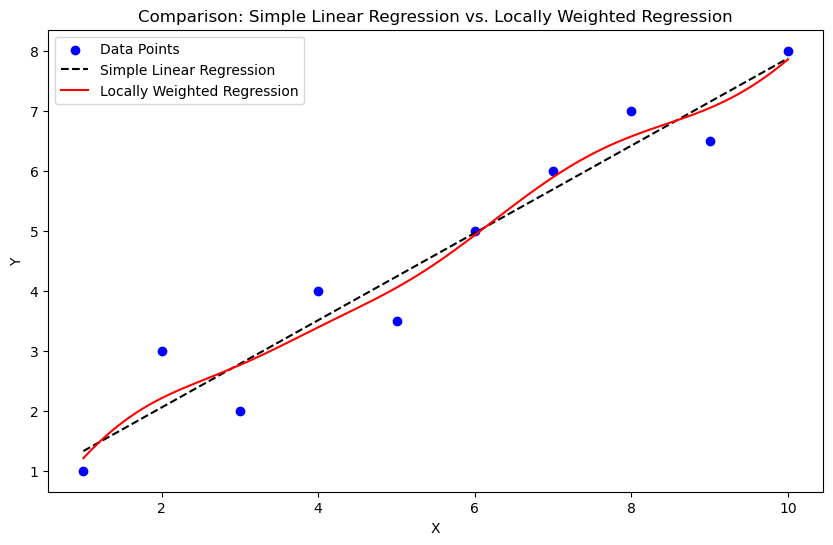

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to calculate weights using a Gaussian kernel
def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

# Function to perform Locally Weighted Regression
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (intercept)
    x_query_b = np.array([1, x_query])  # Prepare the query point with intercept
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Create a diagonal weight matrix
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y  # Calculate regression coefficients
    return x_query_b @ theta  # Return the predicted value

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Input values
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])  # Output values

# Query points for LWR
X_query = np.linspace(1, 10, 100)  # Generate 100 points between 1 and 10
tau = 1.0  # Bandwidth parameter

# Compute LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # Reshape X for sklearn
lin_reg.fit(X_reshaped, y)  # Fit the model
y_lin = lin_reg.predict(X_query.reshape(-1, 1))  # Predict using the linear model

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Plot original data points
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')  # Plot linear regression
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')  # Plot LWR predictions
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

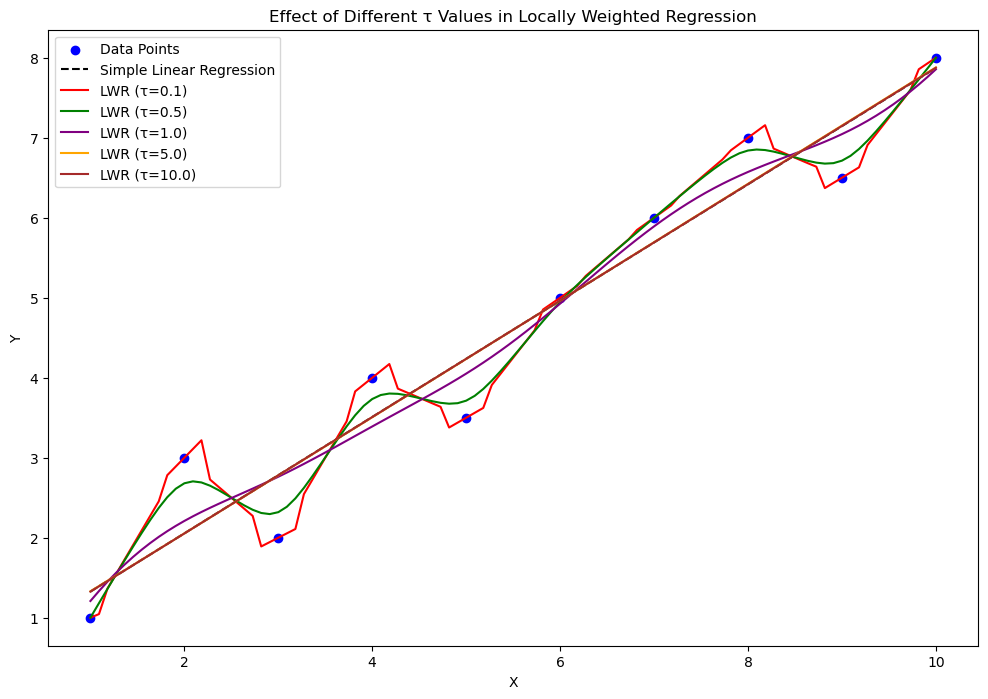

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to calculate weights using a Gaussian kernel
def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

# Function to perform Locally Weighted Regression
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (intercept)
    x_query_b = np.array([1, x_query])  # Prepare the query point with intercept
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Create a diagonal weight matrix
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y  # Calculate regression coefficients using pseudo-inverse
    return x_query_b @ theta  # Return the predicted value

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Input values
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])  # Output values

# Query points for LWR
X_query = np.linspace(1, 10, 100)  # Generate 100 points between 1 and 10
tau_values = [0.1, 0.5, 1.0, 5.0, 10.0]  # Different bandwidth values

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # Reshape X for sklearn
lin_reg.fit(X_reshaped, y)  # Fit the model
y_lin = lin_reg.predict(X_query.reshape(-1, 1))  # Predict using the linear model

# Visualizing the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data Points')  # Plot original data points
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')  # Plot linear regression

# Plot LWR for different tau values
colors = ['red', 'green', 'purple', 'orange', 'brown']
for tau, color in zip(tau_values, colors):
    y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])  # Compute LWR predictions
    plt.plot(X_query, y_lwr, color=color, label=f'LWR (τ={tau})')  # Plot LWR predictions

plt.title("Effect of Different τ Values in Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
s